In [32]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [59]:
from fastai import *
from fastai.vision import *
from functools import partial
from callbacks import SaveEveryNIterations, StopAfterNIterations

## Setting up model for experimentation

In [89]:
PATH = Path('/Users/akash/Desktop/AI/Deep learning/GitHub Uploads/Donkeys vs Horses/data')
def get_data(bs=16, size=224):
    data = (ImageItemList.from_folder(path=PATH)
            .filter_by_folder(include=['Donkey', 'Horse'])
            .random_split_by_pct(0.2)
            .label_from_folder()
            .transform(get_transforms(max_warp=0), size=size)
            .databunch(bs=bs)
            .normalize(imagenet_stats))
    return data

<hr>


In [90]:
saver_callback = partial(SaveEveryNIterations, num_iterations=10)
stopper = partial(StopAfterNIterations, num_iterations = 17)

In [91]:
data = get_data(4, 224)

In [92]:
learn = create_cnn(data, models.resnet18, callback_fns = [saver_callback, stopper])

In [93]:
learn.metrics.append(accuracy)

In [94]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy


Model saved as saved_every_10_iterations | Iteration : 10
Iteration 17 reached. Stopping Training
Run learn.validate(learn.data.valid_dl) to see results


In [95]:
print('hello')

hello


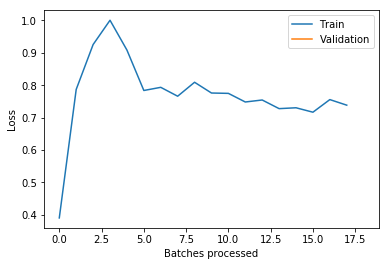

In [79]:
learn.recorder.plot_losses()

In [78]:
learn.validate()

[0.4480532, tensor(0.7882)]